# Classification Practice

In [71]:
import pandas as pd
import numpy as np

In [72]:
data = pd.read_csv("Data/StocksData/train.csv")

In [73]:
data.head()

,is_profit,sym,datetime,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,...,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,True,MGNX,2020-11-02 11:13:00,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,...,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
1,True,MGNX,2020-11-02 13:55:00,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,...,0.001062,0.000504,265.0,67.0,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148
2,True,AEIS,2020-11-02 14:08:00,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,...,-0.001020,0.000000,278.0,13.0,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000
3,False,BERY,2020-11-02 11:20:00,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,...,-0.000210,0.000000,110.0,8.0,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596
4,True,CSGP,2020-11-02 13:19:00,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,...,-0.000012,0.000000,229.0,29.0,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258729 entries, 0 to 258728
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   is_profit                 258729 non-null  bool   
 1   sym                       258729 non-null  object 
 2   datetime                  258729 non-null  object 
 3   rsi14                     258729 non-null  float64
 4   sma9_var                  258729 non-null  float64
 5   sma180_var                258729 non-null  float64
 6   vwap_var                  258729 non-null  float64
 7   spread14_e                258729 non-null  float64
 8   volume14_34_var           258729 non-null  float64
 9   prev_close_var            258729 non-null  float64
 10  prev_floor_var            258729 non-null  float64
 11  prev_ceil_var             258729 non-null  float64
 12  prev1_candle_score        258729 non-null  float64
 13  prev2_candle_score        258729 non-null  f

In [75]:
data.describe()

,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,prev1_candle_score,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
count,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000,2.587290e+05,258729.000000,258729.000000,258729.000000,258729.000000,258729.000000
mean,34.566266,-0.002659,-0.011785,-0.009576,0.000885,-0.043627,-0.011264,0.008169,-0.029425,-0.000447,-0.000308,-0.000227,153.982437,21.184722,2.308488e-01,4.334379,-0.012540,0.001312,-0.024700,0.005857
std,5.463582,0.002344,0.014630,0.010056,0.000765,0.310340,0.029305,0.035277,0.035573,0.001369,0.001365,0.001370,84.162270,17.080638,3.477181e-01,4.002294,0.022699,0.019863,0.018666,0.011748
min,6.140843,-0.019984,-0.199053,-0.126805,0.000002,-1.000000,-0.472370,-0.461067,-0.484095,-0.019355,-0.019976,-0.019794,7.000000,6.000000,3.292790e-07,0.000023,-0.199353,-0.380814,-0.199353,0.000000
25%,31.112562,-0.003322,-0.016985,-0.013535,0.000406,-0.230678,-0.024306,-0.009263,-0.044402,-0.000817,-0.000684,-0.000617,81.000000,11.000000,4.567323e-02,1.391499,-0.022616,-0.006037,-0.031469,0.000000
50%,34.838873,-0.001950,-0.008588,-0.007803,0.000653,-0.047021,-0.010424,0.004781,-0.024675,-0.000122,0.000000,0.000000,153.000000,16.000000,1.135529e-01,3.206725,-0.010670,0.001053,-0.019633,0.000146
75%,38.210769,-0.001157,-0.003302,-0.003722,0.001089,0.134563,0.002043,0.021539,-0.010008,0.000000,0.000131,0.000220,228.000000,26.000000,2.711559e-01,6.072402,-0.001030,0.008101,-0.012181,0.006989
max,71.815499,0.002438,0.183595,0.071907,0.012104,1.428571,0.401252,0.485255,0.361120,0.019420,0.018942,0.019754,299.000000,199.000000,9.001892e+00,44.138675,0.186471,0.385026,-0.000223,0.198972


In [76]:
corr = data.corr()

<AxesSubplot:>

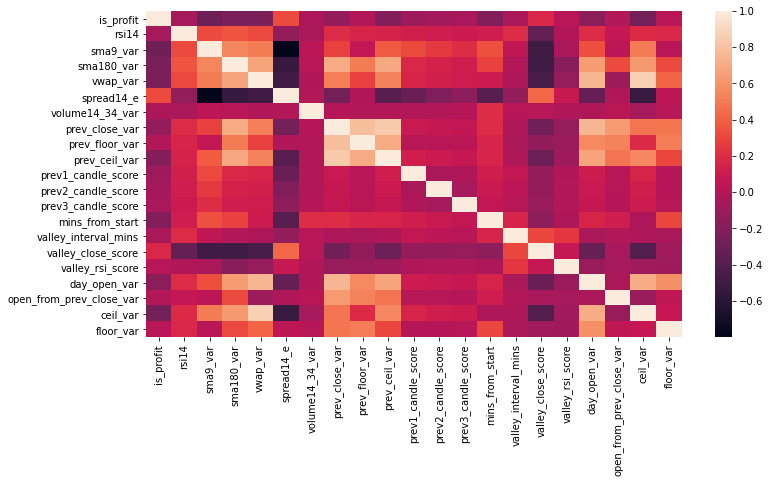

In [77]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(corr)

In [78]:
X= data

In [79]:
X.head()

,is_profit,sym,datetime,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,...,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,True,MGNX,2020-11-02 11:13:00,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,...,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
1,True,MGNX,2020-11-02 13:55:00,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,...,0.001062,0.000504,265.0,67.0,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148
2,True,AEIS,2020-11-02 14:08:00,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,...,-0.001020,0.000000,278.0,13.0,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000
3,False,BERY,2020-11-02 11:20:00,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,...,-0.000210,0.000000,110.0,8.0,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596
4,True,CSGP,2020-11-02 13:19:00,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,...,-0.000012,0.000000,229.0,29.0,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470


In [80]:
y=data['is_profit']

In [81]:
y.head()

0     True
1     True
2     True
3    False
4     True
Name: is_profit, dtype: bool

In [82]:
del X['is_profit']

In [83]:
del X['datetime']

In [85]:
del X['sym']

In [86]:
X.head()

,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,prev1_candle_score,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,-0.012658,-0.047328,-0.002925,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
1,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,-0.007384,-0.042239,0.000000,0.001062,0.000504,265.0,67.0,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148
2,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,0.023360,-0.014706,0.000000,-0.001020,0.000000,278.0,13.0,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000
3,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,0.023517,0.001266,-0.000105,-0.000210,0.000000,110.0,8.0,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596
4,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,0.035230,-0.001628,-0.000375,-0.000012,0.000000,229.0,29.0,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470


In [87]:
y.head()

0     True
1     True
2     True
3    False
4     True
Name: is_profit, dtype: bool

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [91]:
x_train.shape

(194046, 20)

In [92]:
x_test.shape

(64683, 20)

In [93]:
y_train.shape

(194046,)

In [94]:
y_test.shape

(64683,)

In [121]:
lr = LogisticRegression()

In [122]:
clf=lr.fit(x_train, y_train)

C:\Users\isham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
a=clf.predict(x_test)

In [133]:
for i in range(len(a)):
    print("Profit =", a[i])

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profi

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = 

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = Fa

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = 

Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = Fa

Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = F

Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = Tru

Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = T

Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = Fal

Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = F

Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit =

Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True


Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit =

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit =

Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit 

Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = Tr

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit 

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit 

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profi

Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = Fa

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = F

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = Fal

Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit 

Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = Tru

Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profi

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit =

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit =

Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Prof

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit 

Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = 

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = Tru

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Prof

Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit =

Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = Tr

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Prof

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit =

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = 

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = Fal

Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = Fa

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = Fa

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = 

Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit =

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = Fals

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = Fal

Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = Fa

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Pro

Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = Fal

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit 

Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False


Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = Fals

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit =

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = Fa

Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = 

Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = Fa

Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = 

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit =

Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Prof

Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = Fa

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit =

Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profi

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit =

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Pro

Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profi

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Pr

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit 

Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = Fals

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = Fal

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit =

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = F

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = 

Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = Fals

Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
P

Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = True
Profit = T

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = Fa

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit 

Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = Fa

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = 

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = 

Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False


Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit

Profit = False
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = F

Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = 

Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = True
Profit = True
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = 

Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = True
Profit = True
Profit = False
Profit = True
Profit = False
Profit = False
Profit = False
Profit = False
Profit = True
Profit =

In [123]:
print(lr.intercept_,lr.coef_)

[-0.90157763] [[ 1.48262277e-02 -8.33939118e-01 -3.51868249e+00 -3.16467545e+00
   2.91796994e-01  2.87345743e-01 -2.63579753e+00  4.20110919e+00
  -9.11917324e+00 -1.41969743e-01 -1.06599992e-01 -7.19076470e-02
  -4.97141145e-03 -5.38653386e-03  4.53386027e-01 -9.83168163e-03
  -3.84206064e+00  1.23723935e+00 -8.85070292e+00  2.62184554e+00]]


In [129]:
predictions = lr.predict(x_test)

In [130]:
score = lr.score(x_test, y_test)
print(score)

0.681972079217105


In [131]:
score = lr.score(x_train, y_train)
print(score)

0.6834874205085392
